In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices, dmatrix

In [2]:
import requests
import http
import json

stocks1 ='MSFT'
stocks2 ='AAPL'

In [3]:
stdate='2017-01-01'
edate='2017-01-30'

In [4]:
base_url='https://api.intrinio.com/prices'

In [5]:
username='295f1290d54f1d243079ae5efe34161a'
password='d9401971e7de1dab216a987f26195965'

In [6]:
auth_values = (username,password)

In [7]:
m_url = base_url +'?'+'identifier='+ stocks1 +'&'+'start_date='+stdate+'&'+'end_date='+edate
apple_url =base_url +'?'+'identifier='+ stocks2 +'&'+'start_date='+stdate+'&'+'end_date='+edate

In [8]:
response = requests.get(m_url,auth=auth_values)

In [9]:
response_apple= requests.get(apple_url,auth=auth_values)

In [10]:
d = response.json()
a= response_apple.json()

In [11]:
_data1=pd.read_json(json.dumps(a['data']),orient='list')
_data=pd.read_json(json.dumps(d['data']) , orient='list')

In [12]:
DF_apple= _data1[['open','close','date']]

In [13]:
DF_m=_data[['open','close','date']]

In [14]:
DF_apple.head()

,open,close,date
0,120.93,121.63,2017-01-30
1,122.14,121.95,2017-01-27
2,121.67,121.94,2017-01-26
3,120.42,121.88,2017-01-25
4,119.55,119.97,2017-01-24


In [15]:
DF_m.head()

,open,close,date
0,65.69,65.13,2017-01-30
1,65.39,65.78,2017-01-27
2,64.12,64.27,2017-01-26
3,63.95,63.68,2017-01-25
4,63.20,63.52,2017-01-24


In [16]:
columns_Apple=DF_apple.rename(index=str,columns={"open":"App_open","close":"App_close"})

In [17]:
columns_Micro= DF_m.rename(index=str,columns={"open":"Micro_open","close":"Micro_close"})

In [18]:
stock_result= pd.merge(columns_Apple,columns_Micro,on='date')

In [19]:
print(stock_result)

    App_open  App_close       date  Micro_open  Micro_close
0    120.930     121.63 2017-01-30       65.69        65.13
1    122.140     121.95 2017-01-27       65.39        65.78
2    121.670     121.94 2017-01-26       64.12        64.27
3    120.420     121.88 2017-01-25       63.95        63.68
4    119.550     119.97 2017-01-24       63.20        63.52
5    120.000     120.08 2017-01-23       62.70        62.96
6    120.450     120.00 2017-01-20       62.67        62.74
7    119.400     119.78 2017-01-19       62.24        62.30
8    120.000     119.99 2017-01-18       62.67        62.50
9    118.340     120.00 2017-01-17       62.68        62.53
10   119.110     119.04 2017-01-13       62.62        62.70
11   118.895     119.25 2017-01-12       63.06        62.61
12   118.740     119.75 2017-01-11       62.61        63.19
13   118.770     119.11 2017-01-10       62.73        62.62
14   117.950     118.99 2017-01-09       62.76        62.64
15   116.780     117.91 2017-01-06      

In [20]:
stock_result['Micro_close'] = stock_result['Micro_close'] *1.85

In [21]:
stock_result['App_close'] = stock_result['App_close'] *0.524

In [22]:
print(stock_result)

    App_open  App_close       date  Micro_open  Micro_close
0    120.930   63.73412 2017-01-30       65.69     120.4905
1    122.140   63.90180 2017-01-27       65.39     121.6930
2    121.670   63.89656 2017-01-26       64.12     118.8995
3    120.420   63.86512 2017-01-25       63.95     117.8080
4    119.550   62.86428 2017-01-24       63.20     117.5120
5    120.000   62.92192 2017-01-23       62.70     116.4760
6    120.450   62.88000 2017-01-20       62.67     116.0690
7    119.400   62.76472 2017-01-19       62.24     115.2550
8    120.000   62.87476 2017-01-18       62.67     115.6250
9    118.340   62.88000 2017-01-17       62.68     115.6805
10   119.110   62.37696 2017-01-13       62.62     115.9950
11   118.895   62.48700 2017-01-12       63.06     115.8285
12   118.740   62.74900 2017-01-11       62.61     116.9015
13   118.770   62.41364 2017-01-10       62.73     115.8470
14   117.950   62.35076 2017-01-09       62.76     115.8840
15   116.780   61.78484 2017-01-06      

In [23]:
stock_result['case']= np.where((stock_result['Micro_open']>stock_result['App_close']).all and (stock_result['Micro_close']<= stock_result['App_open']).all,'yes','no')

In [24]:
stock_result

,App_open,App_close,date,Micro_open,Micro_close,case
0,120.930,63.73412,2017-01-30,65.69,120.4905,yes
1,122.140,63.90180,2017-01-27,65.39,121.6930,yes
2,121.670,63.89656,2017-01-26,64.12,118.8995,yes
3,120.420,63.86512,2017-01-25,63.95,117.8080,yes
4,119.550,62.86428,2017-01-24,63.20,117.5120,yes
5,120.000,62.92192,2017-01-23,62.70,116.4760,yes
6,120.450,62.88000,2017-01-20,62.67,116.0690,yes
7,119.400,62.76472,2017-01-19,62.24,115.2550,yes
8,120.000,62.87476,2017-01-18,62.67,115.6250,yes
9,118.340,62.88000,2017-01-17,62.68,115.6805,yes


In [25]:
stock_result['cofficent'] = (stock_result['App_open'] - stock_result['Micro_open'])/stock_result['Micro_open']

In [26]:
average_micro = stock_result['cofficent'].mean()

In [27]:
stock_result['cofficent_close'] = (stock_result['Micro_close'] - stock_result['App_close'])/stock_result['App_close']

In [28]:
average_apple= stock_result['cofficent_close'].mean()


In [29]:
average_apple

0.8651775508767796

In [30]:
stock_result['open_portfl'] = (1- average_micro)*stock_result['cofficent']

In [31]:
stock_result['close_portfl'] =(average_apple) * stock_result['cofficent']

In [32]:
DF = stock_result.drop(columns=['cofficent','cofficent_close','case'],axis=1)

In [33]:
DF

,App_open,App_close,date,Micro_open,Micro_close,open_portfl,close_portfl
0,120.930,63.73412,2017-01-30,65.69,120.4905,0.095969,0.727545
1,122.140,63.90180,2017-01-27,65.39,121.6930,0.099045,0.750861
2,121.670,63.89656,2017-01-26,64.12,118.8995,0.102430,0.776528
3,120.420,63.86512,2017-01-25,63.95,117.8080,0.100775,0.763981
4,119.550,62.86428,2017-01-24,63.20,117.5120,0.101754,0.771404
5,120.000,62.92192,2017-01-23,62.70,116.4760,0.104295,0.790665
6,120.450,62.88000,2017-01-20,62.67,116.0690,0.105219,0.797670
7,119.400,62.76472,2017-01-19,62.24,115.2550,0.104809,0.794562
8,120.000,62.87476,2017-01-18,62.67,115.6250,0.104400,0.791457
9,118.340,62.88000,2017-01-17,62.68,115.6805,0.101342,0.768280


In [34]:
DF.reindex()

,App_open,App_close,date,Micro_open,Micro_close,open_portfl,close_portfl
0,120.930,63.73412,2017-01-30,65.69,120.4905,0.095969,0.727545
1,122.140,63.90180,2017-01-27,65.39,121.6930,0.099045,0.750861
2,121.670,63.89656,2017-01-26,64.12,118.8995,0.102430,0.776528
3,120.420,63.86512,2017-01-25,63.95,117.8080,0.100775,0.763981
4,119.550,62.86428,2017-01-24,63.20,117.5120,0.101754,0.771404
5,120.000,62.92192,2017-01-23,62.70,116.4760,0.104295,0.790665
6,120.450,62.88000,2017-01-20,62.67,116.0690,0.105219,0.797670
7,119.400,62.76472,2017-01-19,62.24,115.2550,0.104809,0.794562
8,120.000,62.87476,2017-01-18,62.67,115.6250,0.104400,0.791457
9,118.340,62.88000,2017-01-17,62.68,115.6805,0.101342,0.768280


In [62]:
DF_new=DF.set_index("date")

In [63]:
DF_new.index = pd.DatetimeIndex(DF_new.index)

In [64]:
DF_new

,App_open,App_close,Micro_open,Micro_close,open_portfl,close_portfl
date,,,,,,
2017-01-30,120.930,63.73412,65.69,120.4905,0.095969,0.727545
2017-01-27,122.140,63.90180,65.39,121.6930,0.099045,0.750861
2017-01-26,121.670,63.89656,64.12,118.8995,0.102430,0.776528
2017-01-25,120.420,63.86512,63.95,117.8080,0.100775,0.763981
2017-01-24,119.550,62.86428,63.20,117.5120,0.101754,0.771404
2017-01-23,120.000,62.92192,62.70,116.4760,0.104295,0.790665
2017-01-20,120.450,62.88000,62.67,116.0690,0.105219,0.797670
2017-01-19,119.400,62.76472,62.24,115.2550,0.104809,0.794562
2017-01-18,120.000,62.87476,62.67,115.6250,0.104400,0.791457


In [65]:
DF_new= DF_new.head(5)

In [66]:
DF_new

,App_open,App_close,Micro_open,Micro_close,open_portfl,close_portfl
date,,,,,,
2017-01-30,120.93,63.73412,65.69,120.4905,0.095969,0.727545
2017-01-27,122.14,63.90180,65.39,121.6930,0.099045,0.750861
2017-01-26,121.67,63.89656,64.12,118.8995,0.102430,0.776528
2017-01-25,120.42,63.86512,63.95,117.8080,0.100775,0.763981
2017-01-24,119.55,62.86428,63.20,117.5120,0.101754,0.771404


In [67]:
DF_new=DF_new.reindex(pd.date_range("2017-01-24","2017-01-30"),fill_value=0)

In [68]:
DF_new

,App_open,App_close,Micro_open,Micro_close,open_portfl,close_portfl
2017-01-24,119.55,62.86428,63.20,117.5120,0.101754,0.771404
2017-01-25,120.42,63.86512,63.95,117.8080,0.100775,0.763981
2017-01-26,121.67,63.89656,64.12,118.8995,0.102430,0.776528
2017-01-27,122.14,63.90180,65.39,121.6930,0.099045,0.750861
2017-01-28,0.00,0.00000,0.00,0.0000,0.000000,0.000000
2017-01-29,0.00,0.00000,0.00,0.0000,0.000000,0.000000
2017-01-30,120.93,63.73412,65.69,120.4905,0.095969,0.727545


In [69]:
DF_new = DF_new.fillna(method='ffill')

In [70]:
DF_new

,App_open,App_close,Micro_open,Micro_close,open_portfl,close_portfl
2017-01-24,119.55,62.86428,63.20,117.5120,0.101754,0.771404
2017-01-25,120.42,63.86512,63.95,117.8080,0.100775,0.763981
2017-01-26,121.67,63.89656,64.12,118.8995,0.102430,0.776528
2017-01-27,122.14,63.90180,65.39,121.6930,0.099045,0.750861
2017-01-28,0.00,0.00000,0.00,0.0000,0.000000,0.000000
2017-01-29,0.00,0.00000,0.00,0.0000,0.000000,0.000000
2017-01-30,120.93,63.73412,65.69,120.4905,0.095969,0.727545


In [71]:
DF_new.ffill(inplace=True)

In [72]:
DF_new

,App_open,App_close,Micro_open,Micro_close,open_portfl,close_portfl
2017-01-24,119.55,62.86428,63.20,117.5120,0.101754,0.771404
2017-01-25,120.42,63.86512,63.95,117.8080,0.100775,0.763981
2017-01-26,121.67,63.89656,64.12,118.8995,0.102430,0.776528
2017-01-27,122.14,63.90180,65.39,121.6930,0.099045,0.750861
2017-01-28,0.00,0.00000,0.00,0.0000,0.000000,0.000000
2017-01-29,0.00,0.00000,0.00,0.0000,0.000000,0.000000
2017-01-30,120.93,63.73412,65.69,120.4905,0.095969,0.727545


In [73]:
DF_n= DF_new.fillna(method='bfill')

In [74]:
DF_n

,App_open,App_close,Micro_open,Micro_close,open_portfl,close_portfl
2017-01-24,119.55,62.86428,63.20,117.5120,0.101754,0.771404
2017-01-25,120.42,63.86512,63.95,117.8080,0.100775,0.763981
2017-01-26,121.67,63.89656,64.12,118.8995,0.102430,0.776528
2017-01-27,122.14,63.90180,65.39,121.6930,0.099045,0.750861
2017-01-28,0.00,0.00000,0.00,0.0000,0.000000,0.000000
2017-01-29,0.00,0.00000,0.00,0.0000,0.000000,0.000000
2017-01-30,120.93,63.73412,65.69,120.4905,0.095969,0.727545


In [93]:
DF_n.reset_index()

,index,App_open,App_close,Micro_open,Micro_close,open_portfl,close_portfl
0,2017-01-24,119.55,62.86428,63.20,117.5120,0.101754,0.771404
1,2017-01-25,120.42,63.86512,63.95,117.8080,0.100775,0.763981
2,2017-01-26,121.67,63.89656,64.12,118.8995,0.102430,0.776528
3,2017-01-27,122.14,63.90180,65.39,121.6930,0.099045,0.750861
4,2017-01-28,0.00,0.00000,0.00,0.0000,0.000000,0.000000
5,2017-01-29,0.00,0.00000,0.00,0.0000,0.000000,0.000000
6,2017-01-30,120.93,63.73412,65.69,120.4905,0.095969,0.727545


In [127]:
DF_n1=DF_n[['App_close','Micro_close']]

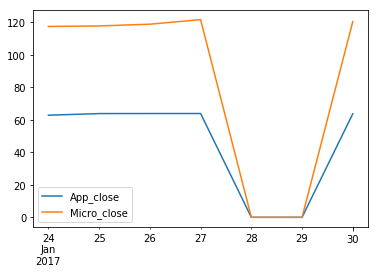

In [128]:
DF_n1.plot()

In [102]:
seaborn_df = pd.DataFrame(DF_n,columns=['App_close'])

In [103]:
seaborn_df

,App_close
2017-01-24,62.86428
2017-01-25,63.86512
2017-01-26,63.89656
2017-01-27,63.90180
2017-01-28,0.00000
2017-01-29,0.00000
2017-01-30,63.73412


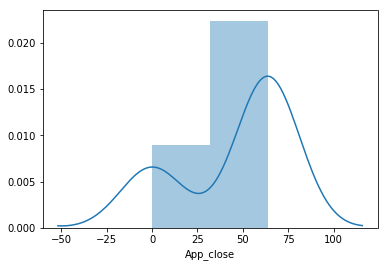

In [110]:
sns.distplot(seaborn_df['App_close'])

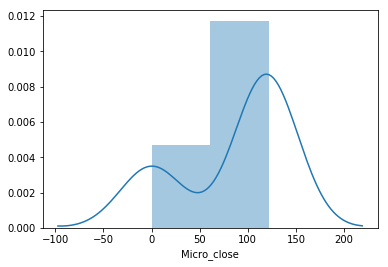

In [112]:
sns.distplot(DF_n['Micro_close'])